In [1]:
import numpy as np
import pandas as pd
import statistics
import os

In [2]:
csv_data = pd.read_csv("./salience_csv/Landmarken_mit_Faktorenwerten.csv", delimiter=";", decimal=",")
ids = csv_data['ID']
salience = csv_data['Salienz_gerundet']
category = csv_data['Category']
cat_detail = csv_data['Category_detailed']

In [3]:
predictions = pd.read_csv("./dnn_predictions.csv", delimiter=",", header=None)
print(predictions.head)

<bound method NDFrame.head of                  0      1         2         3          4
0      15.6.3.jpeg  0.726  0.584427  0.141573  19.500463
1      3.13.3.jpeg  0.394  0.501703  0.107703  27.335823
2     10.34.2.jpeg  0.520  0.612161  0.092161  17.723254
3      9.17.2.jpeg  0.662  0.613299  0.048701   7.356600
4       8.3.1.jpeg  0.492  0.599663  0.107663  21.882679
...            ...    ...       ...       ...        ...
1261  20.18.3.jpeg  0.412  0.536771  0.124771  30.284107
1262  12.33.2.jpeg  0.426  0.601761  0.175761  41.258517
1263  20.10.1.jpeg  0.604  0.446367  0.157633  26.098145
1264    4.1.3.jpeg  0.720  0.514543  0.205457  28.535670
1265   9.11.3.jpeg  0.512  0.691138  0.179138  34.987815

[1266 rows x 5 columns]>


In [7]:
# doors

indices = np.where(cat_detail == 'door')
ids_door = np.asarray(ids[indices[0]])

predictions_ids = predictions[0].to_numpy()

relevant_ids = []
for pred_idx, pred_id in enumerate(predictions_ids):
    lm_id = '.'.join(pred_id.split('.')[:2])
    if lm_id in ids_door and lm_id not in relevant_ids:
        relevant_ids.append(lm_id)

predictions_mape = predictions[4].to_numpy()

mape_cat = []
for idx, val in enumerate(predictions_ids):
    val = '.'.join(val.split('.')[:2])
    if val in relevant_ids:
        mape_cat.append(predictions_mape[idx])
        
print(len(mape_cat))
print(str(statistics.mean(mape_cat)))

327
13.440404287715031


In [9]:
categories = np.unique(category)

for cat in categories:
    mape_cat = []
    indices = np.where(category == cat)
    relevant_cat_ids = np.asarray(ids[indices[0]])
    
    predictions_ids = predictions[0].to_numpy()
    predictions_mape = predictions[4].to_numpy()

    for idx, val in enumerate(predictions_ids):
        val = '.'.join(val.split('.')[:2])
        if val in relevant_cat_ids:
            mape_cat.append(predictions_mape[idx])
            
    print(cat, str(statistics.mean(mape_cat)))

arch 18.51414588571863
func 14.991566787177057
furn 19.084157970942794
info 17.56347131765882
shop 23.5899243926451


In [15]:
pred = predictions.sort_values(4, ascending=False)
pred.head(20)

# 3.34
# 17.23
# 21.30
# 19.15
# 4.39

,0,1,2,3,4
279,3.34.2.jpeg,0.176,0.548975,0.372975,211.917879
968,17.23.3.jpeg,0.194,0.603979,0.409979,211.329623
463,3.34.3.jpeg,0.176,0.532690,0.356690,202.665037
919,17.23.2.jpeg,0.194,0.583259,0.389259,200.649116
914,17.23.1.jpeg,0.194,0.566378,0.372378,191.947636
866,21.30.2.jpeg,0.202,0.582081,0.380081,188.158862
772,21.30.3.jpeg,0.202,0.575241,0.373241,184.772698
356,19.15.1.jpeg,0.248,0.699578,0.451578,182.088090
417,3.34.1.jpeg,0.176,0.488689,0.312689,177.663937
359,19.15.2.jpeg,0.248,0.671227,0.423227,170.655968


In [20]:
predictions_ids = predictions[0].to_numpy()
predictions_mape = predictions[4].to_numpy()

df = pd.read_csv("./salience_csv/Landmarken_mit_Faktorenwerten.csv", delimiter=";", decimal=",")
df["MAPE"] = np.nan

for index, row in df.iterrows():
    lm_id = row['ID']
    lm_mape = 0
    cumulative = 0
    for idx, pred in enumerate(predictions_ids):
        if lm_id == '.'.join(pred.split('.')[:2]):
            lm_mape += predictions_mape[idx]
            cumulative += 1
    if cumulative != 3 and cumulative != 0:
        print("wrong:", lm_id, cumulative)
    df.loc[index,'MAPE'] = lm_mape/3
    
df.head(10)

,ID,SA1,SA2,SA3,SA4,Salienz,Salienz_gerundet,CaseNo,Category,Category_detailed,MAPE
0,2.1,3.21,3.42,3.58,4.63,2.918504,2.92,1,func,door,3.655249
1,2.2,3.20,4.20,4.80,4.40,3.494946,3.49,2,shop,room,13.091754
2,2.3,4.52,4.74,4.53,4.92,3.852467,3.85,3,func,stairs,24.474906
3,2.4,4.50,4.67,4.75,4.58,3.889581,3.89,4,shop,restaurant,20.829178
4,2.5,4.33,4.53,4.40,4.00,3.676931,3.68,5,func,door,7.616726
5,2.6,2.82,3.00,2.73,4.36,2.437969,2.44,6,arch,pillar,18.377210
6,2.7,4.33,3.89,4.78,4.67,3.681096,3.68,7,furn,bench,0.000000
7,2.8,3.29,3.71,4.00,4.71,3.147731,3.15,8,furn,board,0.000000
8,2.9,3.17,3.61,3.39,4.43,2.882624,2.88,9,furn,shelf,8.869569
9,2.10,3.23,3.00,3.00,4.38,2.620611,2.62,10,info,poster,1.812649


---------- SA1 ----------


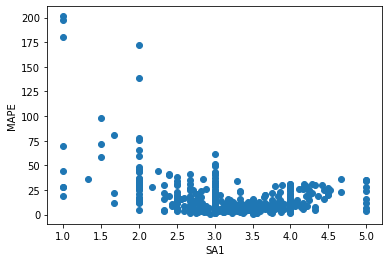

Spearmans correlation: -0.185
Pearsons correlation: -0.383
---------- SA2 ----------


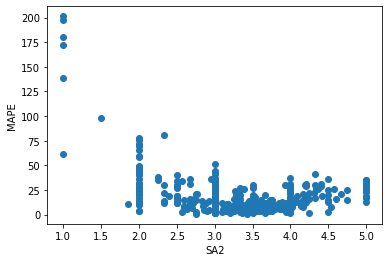

Spearmans correlation: -0.146
Pearsons correlation: -0.420
---------- SA3 ----------


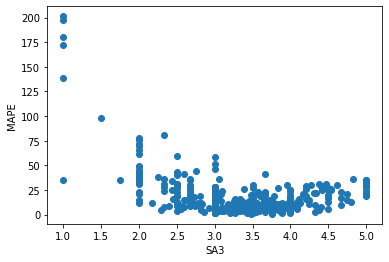

Spearmans correlation: -0.172
Pearsons correlation: -0.434
---------- SA4 ----------


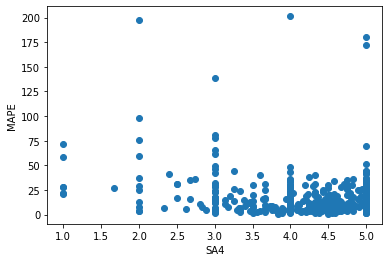

Spearmans correlation: -0.032
Pearsons correlation: -0.187
---------- Salienz_gerundet ----------


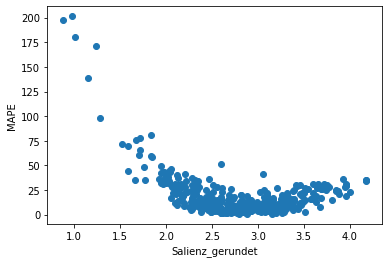

Spearmans correlation: -0.207
Pearsons correlation: -0.467


In [37]:
from matplotlib import pyplot
from scipy.stats import spearmanr, pearsonr

variables = ['SA1', 'SA2', 'SA3', 'SA4', 'Salienz_gerundet']

MAPE = df['MAPE']
indices = np.where(MAPE > 0)
MAPE = MAPE[indices[0]]

for var in variables:
    print(10*'-', var, 10*'-')
    SA = df[var]
    SA = SA[indices[0]]
    
    pyplot.scatter(SA, MAPE)
    pyplot.xlabel(var)
    pyplot.ylabel('MAPE')
    pyplot.show()
    
    corr, _ = spearmanr(SA, MAPE)
    print('Spearmans correlation: %.3f' % corr)
    
    corr, _ = pearsonr(SA, MAPE)
    print('Pearsons correlation: %.3f' % corr)